In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import scanpy as sc
adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat.h5ad')
adata.obs_names[:10]

Index(['AAACCTGAGAAGATTC-1-0-0', 'AAACCTGAGAAGGGTA-1-0-0',
       'AAACCTGAGAGCCTAG-1-0-0', 'AAACCTGAGGATCGCA-1-0-0',
       'AAACCTGAGTGAATTG-1-0-0', 'AAACCTGCAAGTACCT-1-0-0',
       'AAACCTGCAATCACAC-1-0-0', 'AAACCTGCAGACAAAT-1-0-0',
       'AAACCTGCATCTATGG-1-0-0', 'AAACCTGGTATTCGTG-1-0-0'],
      dtype='object')

In [5]:
adata = adata[adata.obs['leiden_0.9'] == '13']
adata.obs['barcode'].value_counts()

barcode
Patient276-D7-CART    880
Patient282-D7-CART    659
Patient245-D7-CART    375
Patient116-D7-CART    183
Patient263-D7-CART     74
Patient253-D7-CART     52
Patient125-D7-CART     30
Axi-N-14               13
Axi-R-03                9
Patient110-D7-CART      6
Axi-N-09                4
Axi-P-05                3
Axi-R-02                3
Axi-N-07                1
Axi-R-13                1
Axi-R-01                1
Axi-N-18                1
Axi-R-19                1
Name: count, dtype: int64

In [6]:
barcode_counts = adata.obs['barcode'].value_counts()
type(barcode_counts)

pandas.core.series.Series

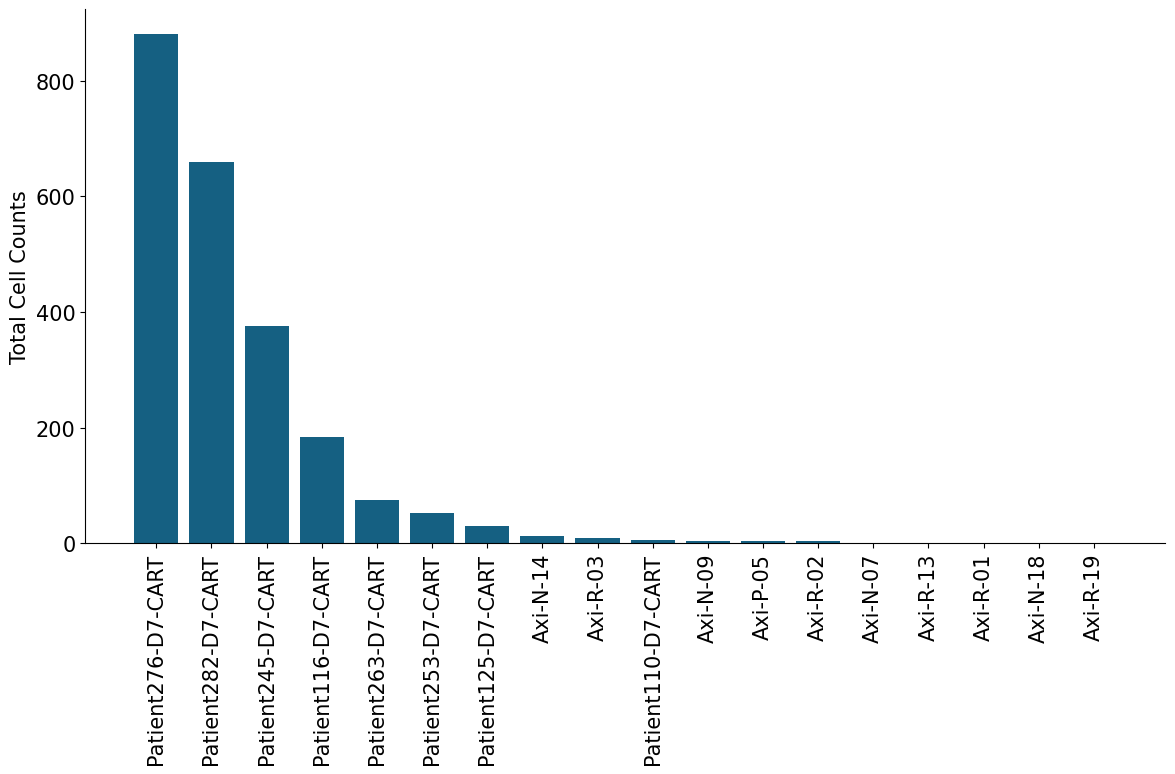

In [7]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

barcode_counts = adata.obs['barcode'].value_counts()
barcode_counts_df = barcode_counts.reset_index()
barcode_counts_df.columns = ['barcode', 'counts']

plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = 15
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.bar(barcode_counts_df['barcode'], barcode_counts_df['counts'], color='#156082')
plt.xlabel('')
plt.ylabel('Total Cell Counts')
plt.title('')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/tmp/ipykernel_57665/4137392635.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = adata.obs.groupby(['barcode', 'leiden_0.9']).size().reset_index(name='counts')
/tmp/ipykernel_57665/4137392635.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_totals = cluster_counts.groupby('barcode')['counts'].transform('sum')


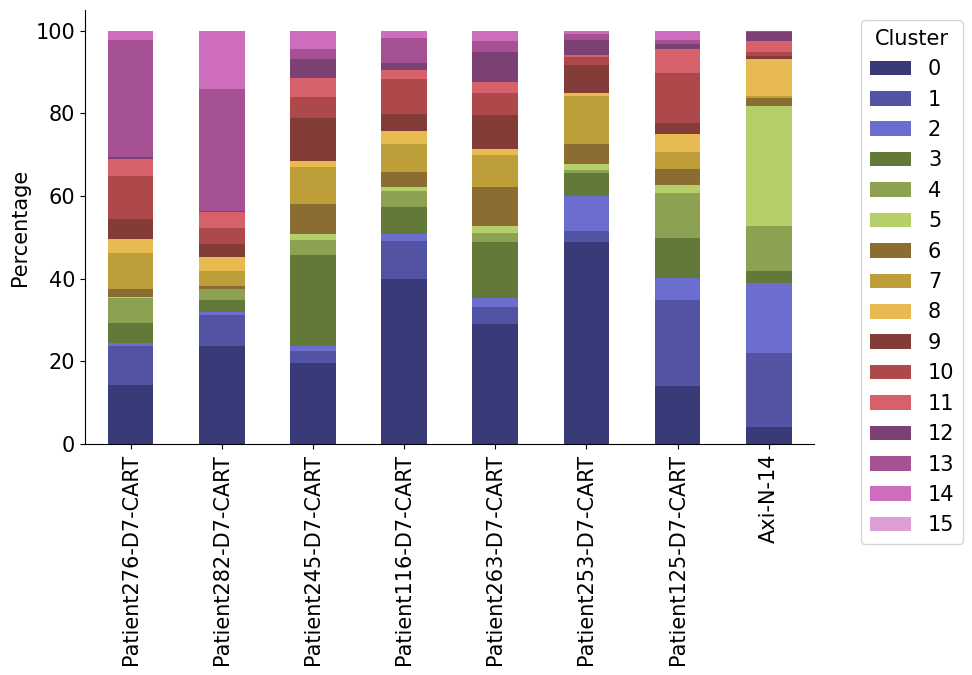

File saved!


In [9]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt


adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat.h5ad')
selected_patients = [
    'Patient276-D7-CART', 'Patient282-D7-CART', 'Patient245-D7-CART', 
    'Patient116-D7-CART', 'Patient263-D7-CART', 'Patient253-D7-CART', 
    'Patient125-D7-CART', 'Axi-N-14'
]

adata = adata[adata.obs['barcode'].isin(selected_patients)]
cluster_counts = adata.obs.groupby(['barcode', 'leiden_0.9']).size().reset_index(name='counts')
group_totals = cluster_counts.groupby('barcode')['counts'].transform('sum')
cluster_counts['percentage'] = 100 * cluster_counts['counts'] / group_totals


pivot_table = cluster_counts.pivot(index='barcode', columns='leiden_0.9', values='percentage')
pivot_table = pivot_table.fillna(0)


pivot_table = pivot_table.loc[selected_patients]
csv_path = '/home/emma/result/CART/cluster13_percentage.csv'
pivot_table.to_csv(csv_path)
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab20b')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Percentage')
plt.xlabel('')
plt.title('')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/home/emma/result/CART/cluster13_percentage.png', dpi=300)
plt.show()

print('File saved!')

/tmp/ipykernel_57665/3859002900.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['reordered_barcode'] = pd.Categorical(adata.obs['barcode'], categories = new_order, ordered=True)
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_d

<Figure size 1200x800 with 0 Axes>

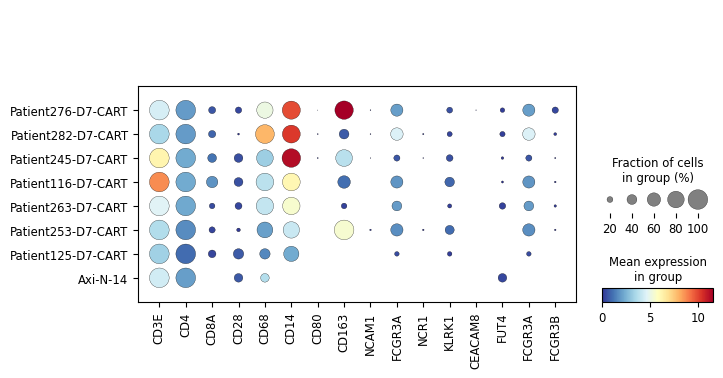

In [ ]:
adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat.h5ad')
adata = adata[adata.obs['leiden_0.9'] == '13'].copy()
new_order = ['Patient276-D7-CART', 'Patient282-D7-CART', 'Patient245-D7-CART', 'Patient116-D7-CART', 'Patient263-D7-CART', 
            'Patient253-D7-CART', 'Patient125-D7-CART', 'Axi-N-14']
adata = adata[adata.obs['cell_type'] == 'CD4'].copy()
adata = adata[adata.obs['barcode'].isin(new_order)]
adata.obs['reordered_barcode'] = pd.Categorical(adata.obs['barcode'], categories = new_order, ordered=True)

all_markers = [
    'CD3E', 'CD4', 'CD8A',  'CD28',   # T cell markers
    'CD68', 'CD14', 'CD80', 'CD163',  # Macrophage markers
    'NCAM1', 'FCGR3A', 'NCR1', 'KLRK1',    # NK cell markers
    'CEACAM8', 'FUT4', 'FCGR3A', 'FCGR3B' # Neutrophil markers
]
plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = 10
ax = sc.pl.dotplot(
    adata,
    all_markers,
    cmap='RdYlBu_r',
    #standard_scale='var',
    groupby='reordered_barcode',
    show=False  # Prevent automatic showing of the plot
)

plt.gcf().set_facecolor('none')  # Set the background color of the figure to none (transparent)
plt.gcf().savefig('/home/emma/result/CART/CD3_CART_subtypes_dotplot_combat_cluster13_CD4.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

/tmp/ipykernel_57665/2926840299.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['reordered_barcode'] = pd.Categorical(adata.obs['barcode'], categories = new_order, ordered=True)
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_d

<Figure size 1200x800 with 0 Axes>

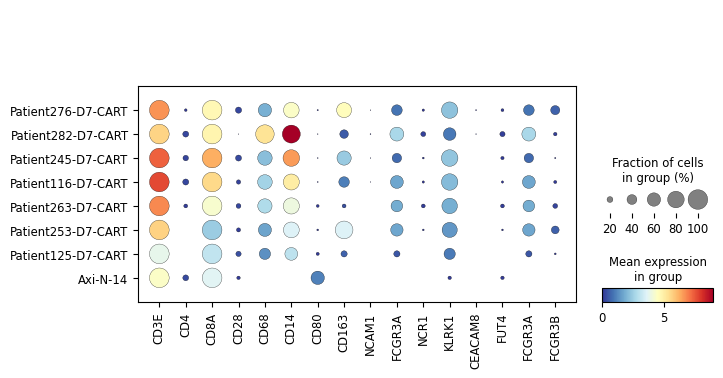

In [ ]:
adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat.h5ad')
adata = adata[adata.obs['leiden_0.9'] == '13'].copy()
new_order = ['Patient276-D7-CART', 'Patient282-D7-CART', 'Patient245-D7-CART', 'Patient116-D7-CART', 'Patient263-D7-CART', 
            'Patient253-D7-CART', 'Patient125-D7-CART', 'Axi-N-14']
adata = adata[adata.obs['cell_type'] == 'CD8'].copy()
adata = adata[adata.obs['barcode'].isin(new_order)]
adata.obs['reordered_barcode'] = pd.Categorical(adata.obs['barcode'], categories = new_order, ordered=True)

all_markers = [
    'CD3E', 'CD4', 'CD8A',  'CD28',   # T cell markers
    'CD68', 'CD14', 'CD80', 'CD163',  # Macrophage markers
    'NCAM1', 'FCGR3A', 'NCR1', 'KLRK1',    # NK cell markers
    'CEACAM8', 'FUT4', 'FCGR3A', 'FCGR3B' # Neutrophil markers
]
plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = 10
ax = sc.pl.dotplot(
    adata,
    all_markers,
    cmap='RdYlBu_r',
    #standard_scale='var',
    groupby='reordered_barcode',
    show=False  # Prevent automatic showing of the plot
)

plt.gcf().set_facecolor('none')  # Set the background color of the figure to none (transparent)
plt.gcf().savefig('/home/emma/result/CART/CD3_CART_subtypes_dotplot_combat_cluster13_CD8.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

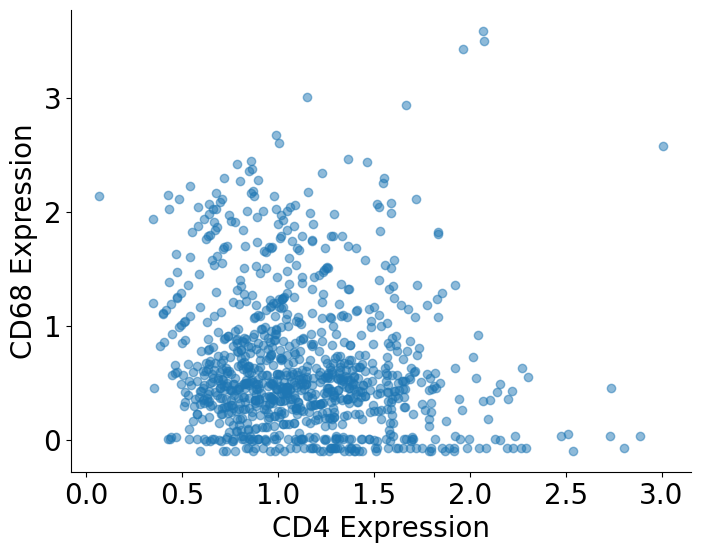

In [2]:
import scanpy as sc
import matplotlib.pyplot as plt

adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat.h5ad')
adata = adata[adata.obs['leiden_0.9'] == '13'].copy()
adata = adata[adata.obs['cell_type'] == 'CD4'].copy()

# Ensure CD4 and CD68 are in the variable names
if 'CD4' not in adata.var_names or 'CD68' not in adata.var_names:
    raise ValueError('CD4 and/or CD68 are not found in the variable names.')

cd4_expression = adata[:, 'CD4'].X.toarray()
cd68_expression = adata[:, 'CD68'].X.toarray()

plt.figure(figsize=(8, 6))
plt.rcParams['font.size'] = 20
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.scatter(cd4_expression, cd68_expression, alpha=0.5)
plt.xlabel('CD4 Expression')
plt.ylabel('CD68 Expression')
plt.title('')
plt.show()

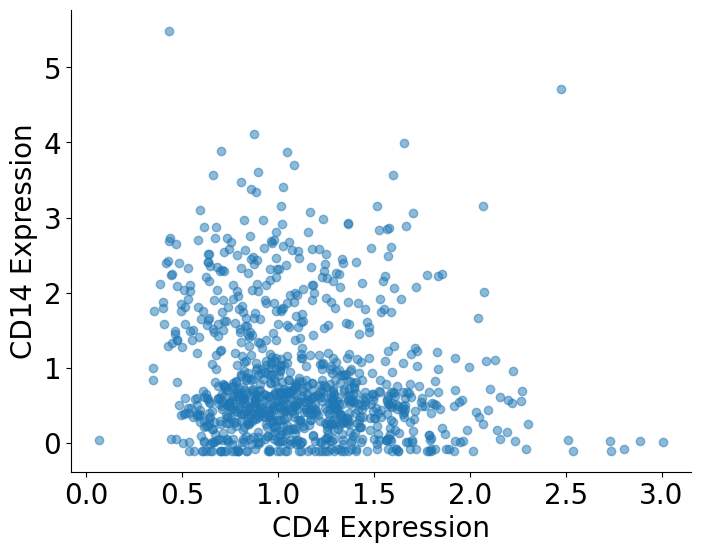

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat.h5ad')
adata = adata[adata.obs['leiden_0.9'] == '13'].copy()
adata = adata[adata.obs['cell_type'] == 'CD4'].copy()

if 'CD4' not in adata.var_names or 'CD68' not in adata.var_names:
    raise ValueError('CD4 and/or CD68 are not found in the variable names.')

cd4_expression = adata[:, 'CD4'].X.toarray()
cd68_expression = adata[:, 'CD14'].X.toarray()

plt.figure(figsize=(8, 6))
plt.rcParams['font.size'] = 20
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.scatter(cd4_expression, cd68_expression, alpha=0.5)
plt.xlabel('CD4 Expression')
plt.ylabel('CD14 Expression')
plt.title('')
plt.show()

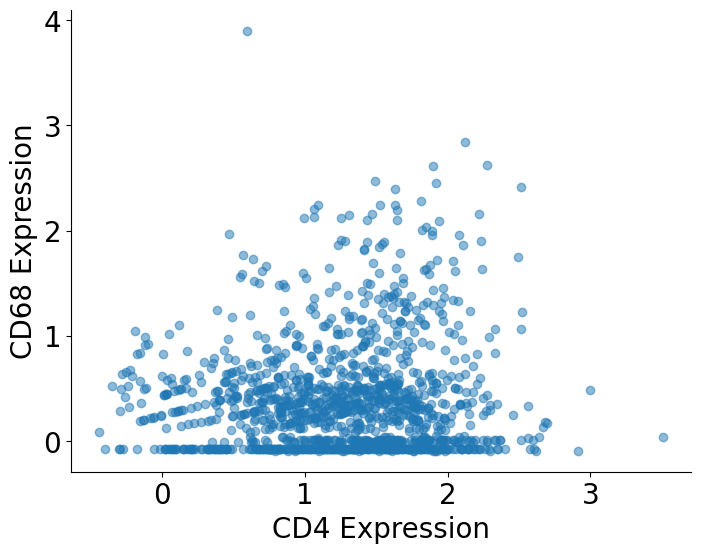

In [4]:
import scanpy as sc
import matplotlib.pyplot as plt

adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat.h5ad')
adata = adata[adata.obs['leiden_0.9'] == '13'].copy()
adata = adata[adata.obs['cell_type'] == 'CD8'].copy()

if 'CD4' not in adata.var_names or 'CD68' not in adata.var_names:
    raise ValueError('CD4 and/or CD68 are not found in the variable names.')

cd4_expression = adata[:, 'CD8A'].X.toarray()
cd68_expression = adata[:, 'CD68'].X.toarray()

plt.figure(figsize=(8, 6))
plt.rcParams['font.size'] = 20
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.scatter(cd4_expression, cd68_expression, alpha=0.5)
plt.xlabel('CD4 Expression')
plt.ylabel('CD68 Expression')
plt.title('')
plt.show()

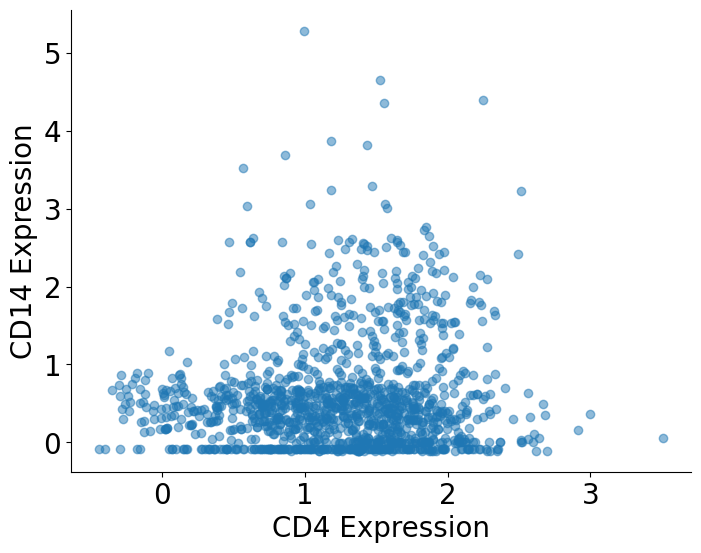

In [6]:
import scanpy as sc
import matplotlib.pyplot as plt

adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat.h5ad')
adata = adata[adata.obs['leiden_0.9'] == '13'].copy()
adata = adata[adata.obs['cell_type'] == 'CD8'].copy()

if 'CD4' not in adata.var_names or 'CD68' not in adata.var_names:
    raise ValueError('CD4 and/or CD68 are not found in the variable names.')

cd4_expression = adata[:, 'CD8A'].X.toarray()
cd68_expression = adata[:, 'CD14'].X.toarray()

plt.figure(figsize=(8, 6))
plt.rcParams['font.size'] = 20
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.scatter(cd4_expression, cd68_expression, alpha=0.5)
plt.xlabel('CD4 Expression')
plt.ylabel('CD14 Expression')
plt.title('')
plt.show()

In [4]:
adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat.h5ad')
adata.obs['barcode'].unique().tolist()

['Axi-R-01',
 'Axi-R-17',
 'Axi-R-15',
 'Axi-N-18',
 'Axi-N-16',
 'Axi-R-13',
 'Axi-R-19',
 'Axi-N-10',
 'Axi-R-11',
 'Axi-N-09',
 'Axi-N-07',
 'Axi-R-08',
 'Axi-P-05',
 'Axi-R-04',
 'Axi-R-03',
 'Axi-N-06',
 'Axi-R-02',
 'Axi-R-12',
 'Axi-N-14',
 'Patient110-D7-CART',
 'Patient116-D7-CART',
 'Patient125-D7-CART',
 'Patient129-D7-CART',
 'Patient245-D7-CART',
 'Patient253-D7-CART',
 'Patient263-D7-CART',
 'Patient276-D7-CART',
 'Patient282-D7-CART']

/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

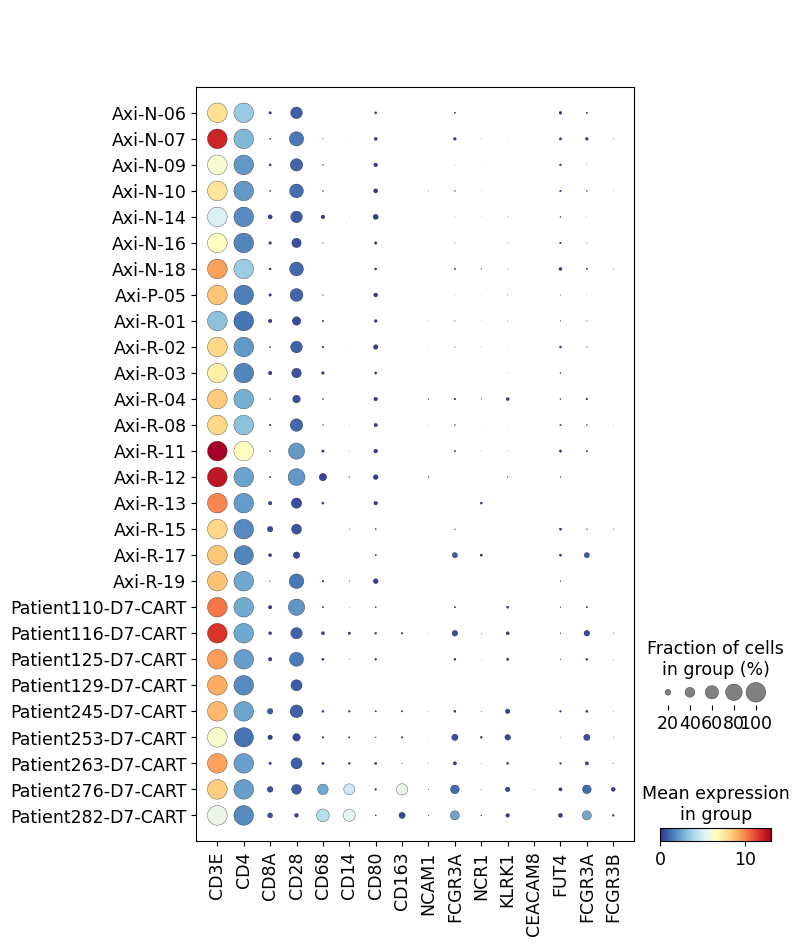

In [19]:
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat.h5ad')
adata = adata[adata.obs['cell_type'] == 'CD4'].copy()

all_markers = [
    'CD3E', 'CD4', 'CD8A',  'CD28',   # T cell markers
    'CD68', 'CD14', 'CD80', 'CD163',  # Macrophage markers
    'NCAM1', 'FCGR3A', 'NCR1', 'KLRK1',    # NK cell markers
    'CEACAM8', 'FUT4', 'FCGR3A', 'FCGR3B' # Neutrophil markers
]


sc.pl.dotplot(
    adata,
    all_markers,
    cmap='RdYlBu_r',
    #standard_scale='var',
    groupby ='barcode',
    #dendrogram = True,
    #save= 'CART_subtypes_dotplot_combat.png'
)

/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

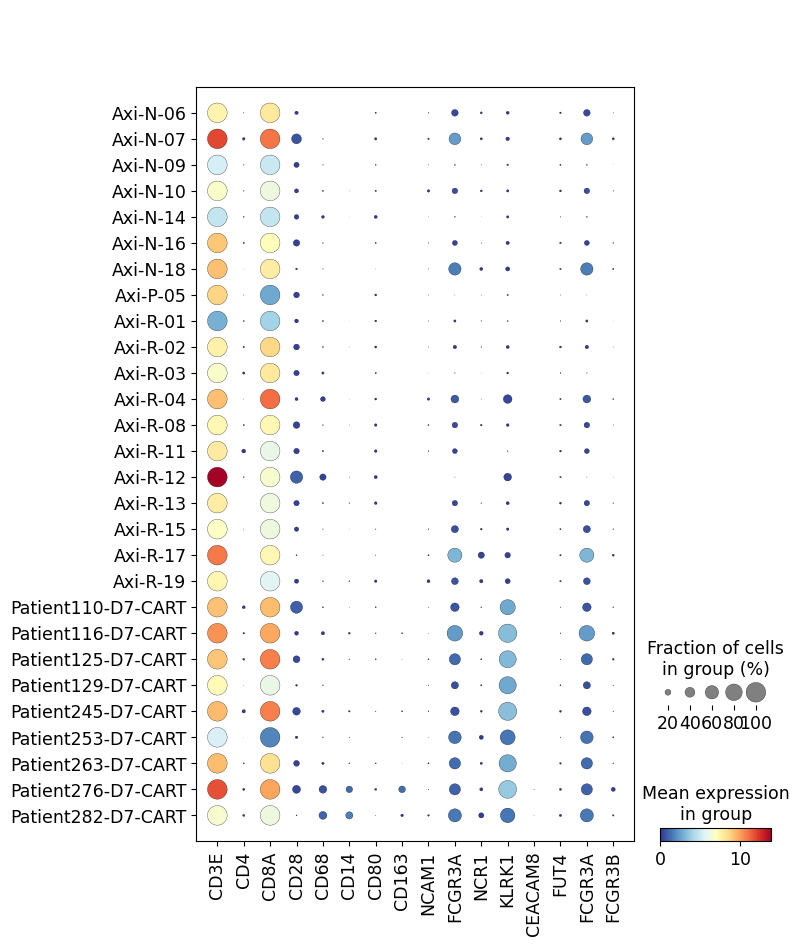

In [20]:
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat.h5ad')
adata = adata[adata.obs['cell_type'] == 'CD8'].copy()
all_markers = [
    'CD3E', 'CD4', 'CD8A',  'CD28',   # T cell markers
    'CD68', 'CD14', 'CD80', 'CD163',  # Macrophage markers
    'NCAM1', 'FCGR3A', 'NCR1', 'KLRK1',    # NK cell markers
    'CEACAM8', 'FUT4', 'FCGR3A', 'FCGR3B' # Neutrophil markers
]

sc.pl.dotplot(
    adata,
    all_markers,
    cmap='RdYlBu_r',
    #standard_scale='var',
    groupby ='barcode',
    #dendrogram = True,
    #save= 'CART_subtypes_dotplot_combat.png'
)

424


/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

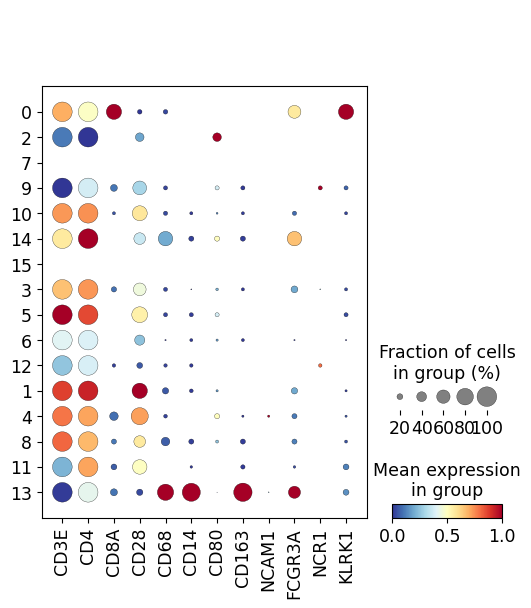

836


/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

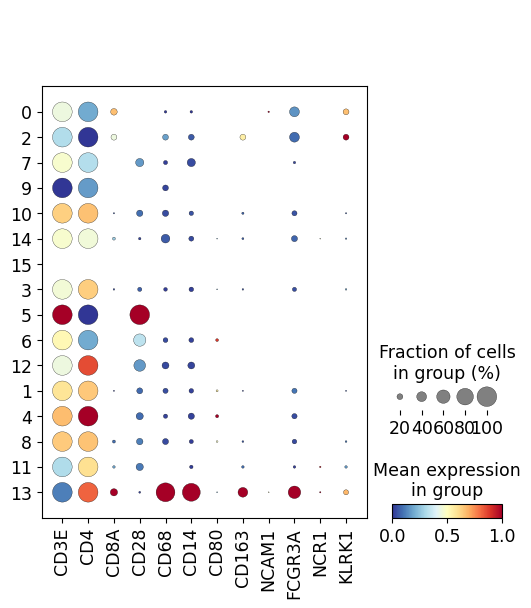

In [22]:
adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_log.h5ad')
adata = adata[adata.obs['cell_type'] == 'CD4'].copy()
patients = ['Patient276-D7-CART', 'Patient282-D7-CART']
for patient in patients:
    adata_filtered = adata[adata.obs['barcode'] == patient].copy()  
    print(adata_filtered.shape[0])
    new_order = ['0','2', '7', '9', '10', '14', '15', '3', '5', '6','12', '1', '4', '8', '11', '13']
    adata_filtered.obs['reordered_clusters'] = pd.Categorical(
        adata_filtered.obs['leiden_0.9'],
        categories= new_order,
        ordered=True
    )
    all_markers = [
    'CD3E', 'CD4', 'CD8A',  'CD28',   # T cell markers
    'CD68', 'CD14', 'CD80', 'CD163',  # Macrophage markers
    'NCAM1', 'FCGR3A', 'NCR1', 'KLRK1'    # NK cell markers
]
    sc.pl.dotplot(
        adata_filtered,
        all_markers,
        cmap='RdYlBu_r',
        standard_scale='var',
        groupby ='reordered_clusters',
        #dendrogram = True,
    #save= 'CART_subtypes_dotplot_combat_all.png'
)
    

2663


/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

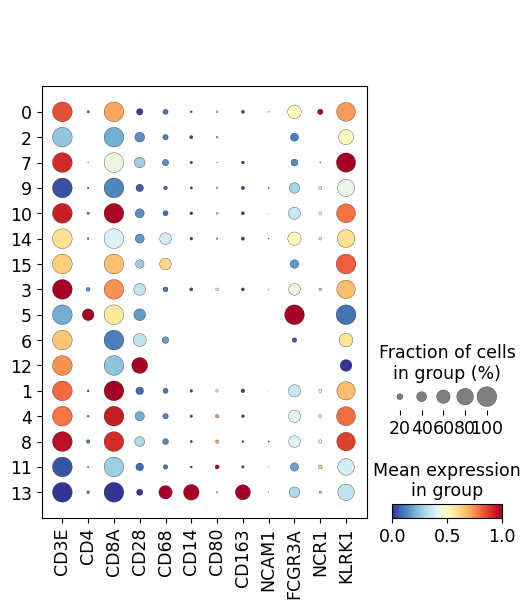

1391


/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/emma/miniconda3/envs/serverGPU/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

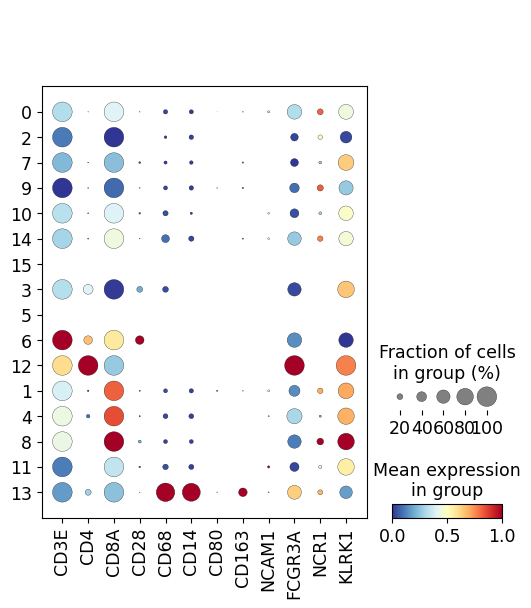

In [21]:
adata = sc.read_h5ad('/home/emma/data/CART/Harvard_Stanford_infusion_D7sorted_CD3E_CD4_CD8A_highly_variable_combat.h5ad')
adata = adata[adata.obs['cell_type'] == 'CD8'].copy()
patients = ['Patient276-D7-CART', 'Patient282-D7-CART']
for patient in patients:
    adata_filtered = adata[adata.obs['barcode'] == patient].copy() 
    print(adata_filtered.shape[0]) 
    new_order = ['0','2', '7', '9', '10', '14', '15', '3', '5', '6','12', '1', '4', '8', '11', '13']
    adata_filtered.obs['reordered_clusters'] = pd.Categorical(
        adata_filtered.obs['leiden_0.9'],
        categories= new_order,
        ordered=True
    )
    all_markers = [
    'CD3E', 'CD4', 'CD8A',  'CD28',   # T cell markers
    'CD68', 'CD14', 'CD80', 'CD163',  # Macrophage markers
    'NCAM1', 'FCGR3A', 'NCR1', 'KLRK1'    # NK cell markers
]
    sc.pl.dotplot(
        adata_filtered,
        all_markers,
        cmap='RdYlBu_r',
        standard_scale='var',
        groupby ='reordered_clusters',
        #dendrogram = True,
    #save= 'CART_subtypes_dotplot_combat_all.png'
)
    